In [1]:
import pandas as pd

columns = ["Day", "Outlook", "Temp", "Humidity", "Wind", "Play?"]
day_data = ["D1", "D2", "D3", "D4", "D5", "D6", "D7", "D8", "D9", "D10", "D11", "D12", "D13", "D14", "D15", "D16"]
outlook_data = ["Sunny", "Sunny", "Overcast", "Rain", "Rain", "Rain", "Overcast", "Sunny", "Sunny", "Rain", "Sunny", "Overcast", "Overcast", "Rain", "Overcast", "Sunny"]
temp_data = ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild", "Mild", "Hot"]
humidity_data = ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High", "Normal", "Normal"]
wind_data = ["Weak", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Strong", "Weak", "Strong"]
play_data = ["No", "No", "No", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "No", "No", "", ""]
df = pd.DataFrame(columns = columns)
df['Day'] = day_data
df['Outlook'] = outlook_data
df['Temp'] = temp_data
df['Humidity'] = humidity_data
df['Wind'] = wind_data
df['Play?'] = play_data
df

,Day,Outlook,Temp,Humidity,Wind,Play?
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,No
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [2]:
from math import log2
# First step of ID3, done manually

#First define the entropy of a decision
numNo = 7
numYes = 7
numTotal = 14
entropyDecision = -(numYes/numTotal * log2(numYes/numTotal)) - (numNo/numTotal * log2(numNo/numTotal))
print("Decision Entropy:",entropyDecision)

# Starting with wind
numWeak = 8 # Not counting D15 and D16
numWeakYes = 4 # Number of times wind was weak and golf was played
numWeakNo = 4 # Number of times wind was not weak (was strong) and golf was played
entropyWindWeak = -(numWeakNo/numWeak * log2(numWeakNo/numWeak)) - (numWeakYes/numWeak * log2(numWeakYes/numWeak))
print("Entropy for weak wind:",entropyWindWeak)

numStrong = 6
numStrongYes = 3
numStrongNo = 3
entropyStrongWind = -(numStrongNo/numStrong * log2(numStrongNo/numStrong)) - (numStrongYes/numStrong * log2(numStrongYes/numStrong))
print("Entropy for strong wind:",entropyStrongWind)

gainWind = entropyDecision - (numWeak/numTotal * entropyWindWeak) - (numStrong/numTotal * entropyStrongWind)
print("Gain for Wind:",gainWind)

# Now for humidity
numHigh = 7
numNormal = 7
numHighYes = 2
numHighNo = 5
numNormalYes = 5
numNormalNo = 2
entropyHigh = -(numHighNo/numHigh * log2(numHighNo/numHigh)) - (numHighYes/numHigh * log2(numHighYes/numHigh))
entropyNormal = -(numNormalNo/numNormal * log2(numNormalNo/numNormal)) - (numNormalYes/numNormal * log2(numNormalYes/numNormal))
print("\nEntropy for high humidity:",entropyHigh)
print("Entropy for normal humidity:",entropyNormal)
gainHumidity = entropyDecision - (numHigh/numTotal * entropyHigh) - (numNormal/numTotal * entropyNormal)
print("Gain for Humidity:",gainHumidity)

# Next, Temperature
numHot = 4
numMild = 6
numCool = 4
numHotYes = 0
numHotNo = 4
numMildYes = 4
numMildNo = 2
numCoolYes = 3
numCoolNo = 1
# entropyHot = -(numHotNo/numHot * log2(numHotNo/numHot)) - (numHotYes/numHot * log2(numHotYes/numHot))
# Just kidding! The entropy for high temperatures is 0, because the value is always No so there is no variation
entropyHot = 0
entropyMild = -(numMildNo/numMild * log2(numMildNo/numMild)) - (numMildYes/numMild * log2(numMildYes/numMild))
entropyCool = -(numCoolNo/numCool * log2(numCoolNo/numCool)) - (numCoolYes/numCool * log2(numCoolYes/numCool))
gainTemp = entropyDecision - (numHot/numTotal * entropyHot) - (numMild/numTotal * entropyMild) - (numCool/numTotal * entropyCool)
print("\nEntropy for hot temp:",entropyHot)
print("Entropy for mild temp:",entropyMild)
print("Entropy for cool temp:",entropyCool)
print("Gain for Temperature:",gainTemp)

# Finally, outlook
numSunny = 5
numOver = 4
numRain = 5
numSunnyYes = 2
numSunnyNo = 3
numOverYes = 2
numOverNo = 2
numRainYes = 3
numRainNo = 2
entropySunny = -(numSunnyNo/numSunny * log2(numSunnyNo/numSunny)) - (numSunnyYes/numSunny * log2(numSunnyYes/numSunny))
entropyOver = -(numOverNo/numOver * log2(numOverNo/numOver)) - (numOverYes/numOver * log2(numOverYes/numOver))
entropyRain = -(numRainNo/numRain * log2(numRainNo/numRain)) - (numRainYes/numRain * log2(numRainYes/numRain))
gainOutlook = entropyDecision - (numSunny/numTotal * entropySunny) - (numOver/numTotal * entropyOver) - (numRain/numTotal * entropyRain)
print("\nEntropy for sunny:",entropySunny)
print("Entropy for overcast:",entropyOver)
print("Entropy for rainy:",entropyRain)
print("Gain for Outlook:",gainOutlook)

print("\nAs we can see above, the highest gain is temperature, so temperature is the first divider in the decision tree. This marks the end of the first step.")

Decision Entropy: 1.0
Entropy for weak wind: 1.0
Entropy for strong wind: 1.0
Gain for Wind: 5.551115123125783e-17

Entropy for high humidity: 0.863120568566631
Entropy for normal humidity: 0.863120568566631
Gain for Humidity: 0.136879431433369

Entropy for hot temp: 0
Entropy for mild temp: 0.9182958340544896
Entropy for cool temp: 0.8112781244591328
Gain for Temperature: 0.37465089270260943

Entropy for sunny: 0.9709505944546686
Entropy for overcast: 1.0
Entropy for rainy: 0.9709505944546686
Gain for Outlook: 0.02074957538952249

As we can see above, the highest gain is temperature, so temperature is the first divider in the decision tree. This marks the end of the first step.


In [3]:
from sklearn.preprocessing import LabelEncoder

def one_hot(df):
    rows_to_encode = ['Outlook', 'Temp', 'Humidity', 'Wind', 'Play?']
    for i in rows_to_encode:
        encoder = LabelEncoder()
        df[i] = encoder.fit_transform(df[i])
        
one_hot(df)
df

,Day,Outlook,Temp,Humidity,Wind,Play?
0,D1,2,1,0,1,1
1,D2,2,1,0,0,1
2,D3,0,1,0,1,1
3,D4,1,2,0,1,2
4,D5,1,0,1,1,2
5,D6,1,0,1,0,1
6,D7,0,0,1,0,2
7,D8,2,2,0,1,1
8,D9,2,0,1,1,2
9,D10,1,2,1,1,2


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree

data = df.iloc[:14,1:-1]
target = df.iloc[:14, -1:]

clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
model = clf.fit(data, target)

In [5]:
d15_data = df.iloc[14:15,1:-1]
d15_prob = model.predict_proba(d15_data)
print("Probabilities for Day 15:",d15_prob,"which corresponds to a 100% probability on 'Yes'")
d16_data = df.iloc[15:16,1:-1]
d16_prob = clf.predict_proba(d16_data)
print("Probabilities for Day 16:",d16_prob,"which corresponds to a 100% probability on 'No'")

Probabilities for Day 15: [[0. 1.]] which corresponds to a 100% probability on 'Yes'
Probabilities for Day 16: [[1. 0.]] which corresponds to a 100% probability on 'No'


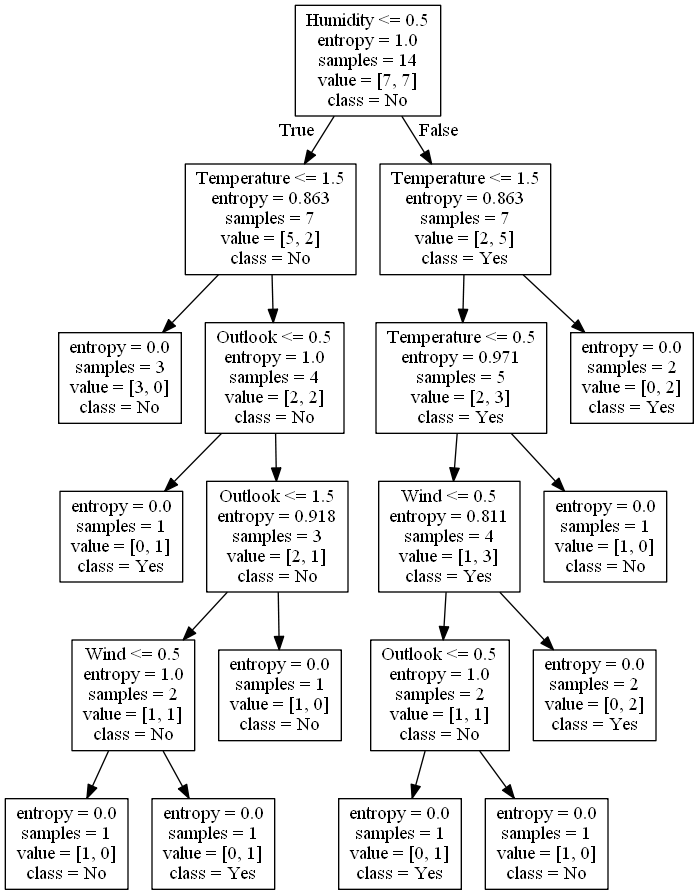

In [6]:
import pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                feature_names=["Outlook","Temperature","Humidity","Wind"],
                                class_names=["No","Yes"])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())